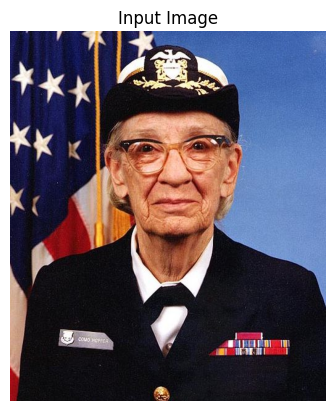

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predictions:
1. military_uniform: 81.48%
2. bearskin: 1.82%
3. mortarboard: 1.50%


In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Function to prepare an image for MobileNetV2
def prepare_image(img):
    img = img.resize((224, 224))  # Resize the image to 224x224
    img_array = np.array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess the image for MobileNetV2
    return img_array

# Function to predict the class of an image
def predict_image_class(img):
    img_array = prepare_image(img)  # Prepare the image
    predictions = model.predict(img_array)  # Generate predictions
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]  # Decode predictions
    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}. {label}: {score*100:.2f}%")

# Example usage: Predict the class of an image from a URL
img_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'
response = requests.get(img_url)
# Check if the request was successful
if response.status_code == 200:
    image_data = BytesIO(response.content)
    img = Image.open(image_data)

    # Display image using matplotlib
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

    # Predict the class
    predict_image_class(img)
else:
    print(f"Error fetching image: Status code {response.status_code}")